In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline

# Loading the dataset
df = pd.read_csv('data.csv')

# Initial data exploration
print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# Dropping unnecessary columns
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

# Converting diagnosis to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Checking for missing values
print("Missing values after cleaning:\n", df.isnull().sum())

# Separating features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Stratified split to preserve class balance
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Missing values after cleaning:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression with regularization and class balancing
log_reg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_reg_pred))
print("\nClassification Report:\n", classification_report(y_test, log_reg_pred))


Logistic Regression Results:
Accuracy: 0.9941520467836257

Confusion Matrix:
 [[107   0]
 [  1  63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.98      0.99        64

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



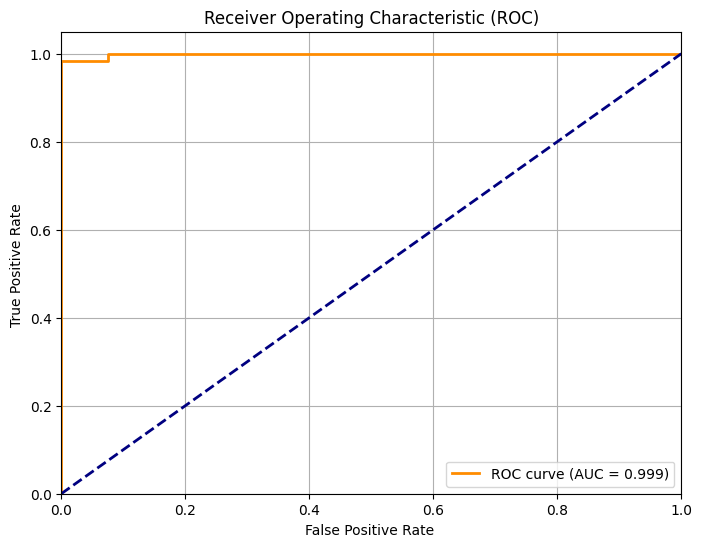

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# الحصول على احتمالات التنبؤ
y_proba = log_reg.predict_proba(X_test)[:, 1]  # احتمالية أن الحالة تكون خبيثة (1)

# حساب منحنى ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# حساب AUC
auc_score = roc_auc_score(y_test, y_proba)

# رسم منحنى ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random false
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest with regularization
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Results:
Accuracy: 0.9766081871345029

Confusion Matrix:
 [[107   0]
 [  4  60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.94      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



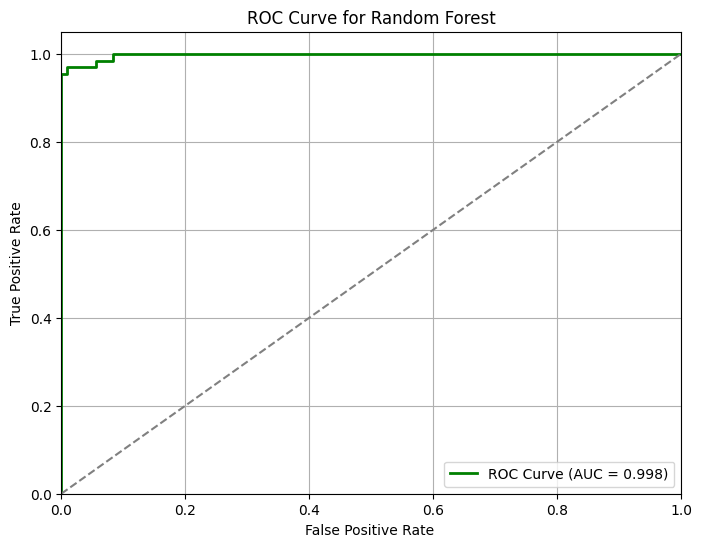

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# الحصول على احتمالات التنبؤ (للإيجابي class=1)
rf_proba = rf.predict_proba(X_test)[:, 1]

# حساب منحنى ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_proba)

# حساب AUC
auc_score_rf = roc_auc_score(y_test, rf_proba)

# رسم المنحنى
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC Curve (AUC = %0.3f)' % auc_score_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')  # الخط العشوائي
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# SVM with regularization
svm = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Evaluation
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))


SVM Results:
Accuracy: 0.9824561403508771

Confusion Matrix:
 [[106   1]
 [  2  62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



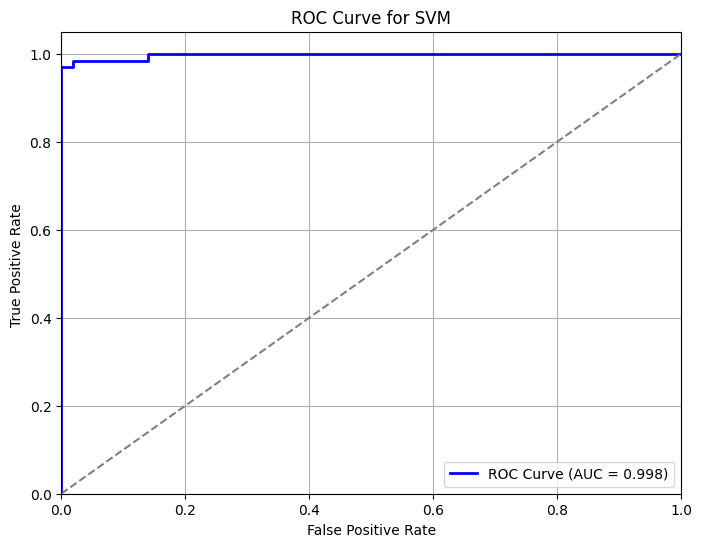

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# الحصول على احتمالات التنبؤ بالفئة 1 (خبيث)
svm_proba = svm.predict_proba(X_test)[:, 1]

# حساب منحنى ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_proba)

# حساب AUC
auc_score_svm = roc_auc_score(y_test, svm_proba)

# رسم المنحنى
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC Curve (AUC = %0.3f)' % auc_score_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')  # الخط العشوائي
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# KNN with better generalization
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='minkowski', p=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Evaluation
print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))


KNN Results:
Accuracy: 0.9590643274853801

Confusion Matrix:
 [[106   1]
 [  6  58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



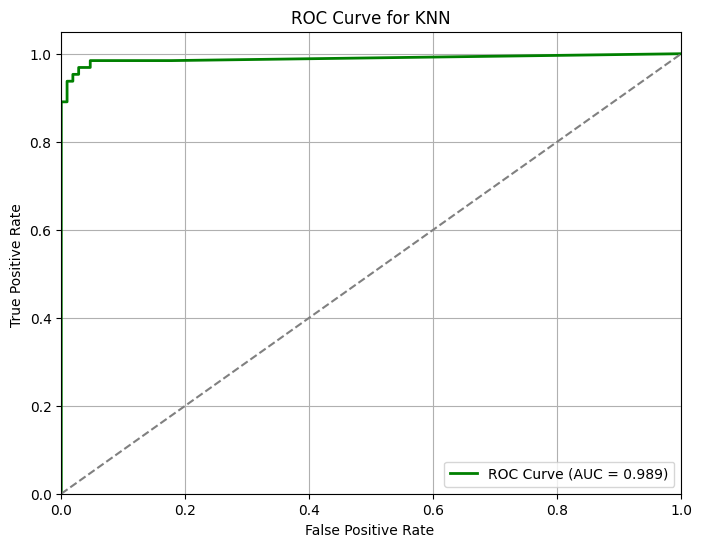

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# الحصول على احتمالات الفئة 1 (خبيث)
knn_proba = knn.predict_proba(X_test)[:, 1]

# حساب منحنى ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_proba)

# حساب AUC
auc_score_knn = roc_auc_score(y_test, knn_proba)

# رسم ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='ROC Curve (AUC = %0.3f)' % auc_score_knn)
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


<ipython-input-13-4d5f17483d31>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Blues', edgecolor='black')


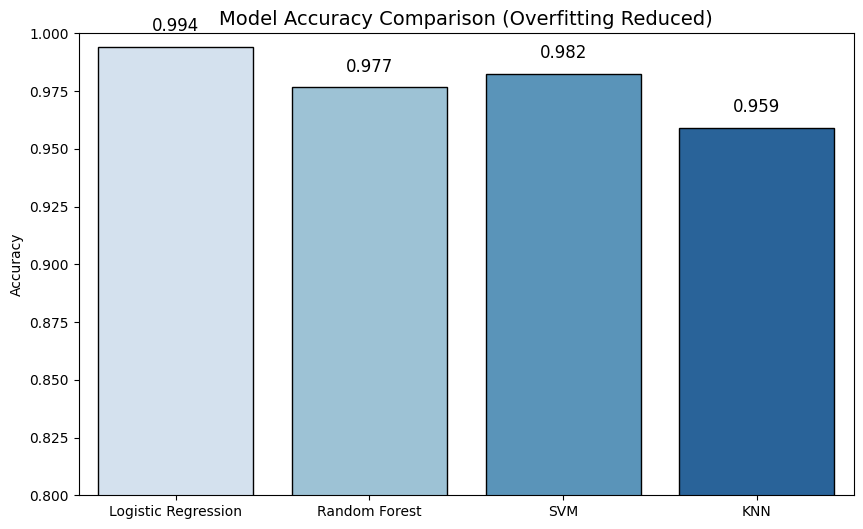

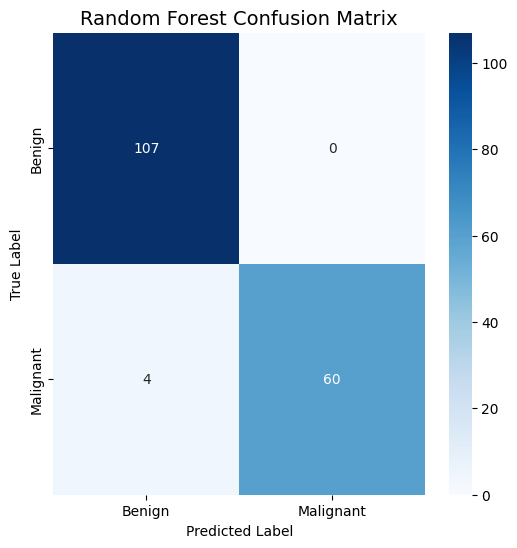

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# ----------- 1. Accuracy Comparison -----------
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies = [accuracy_score(y_test, log_reg_pred),
              accuracy_score(y_test, rf_pred),
              accuracy_score(y_test, svm_pred),
              accuracy_score(y_test, knn_pred)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='Blues', edgecolor='black')
plt.title('Model Accuracy Comparison (Overfitting Reduced)', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)

# عرض دقة كل نموذج على الأعمدة
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=12, color='black')
plt.show()

# ----------- 2. Confusion Matrix for Random Forest -----------
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<ipython-input-14-65ae1f426092>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='Blues', edgecolor='black')


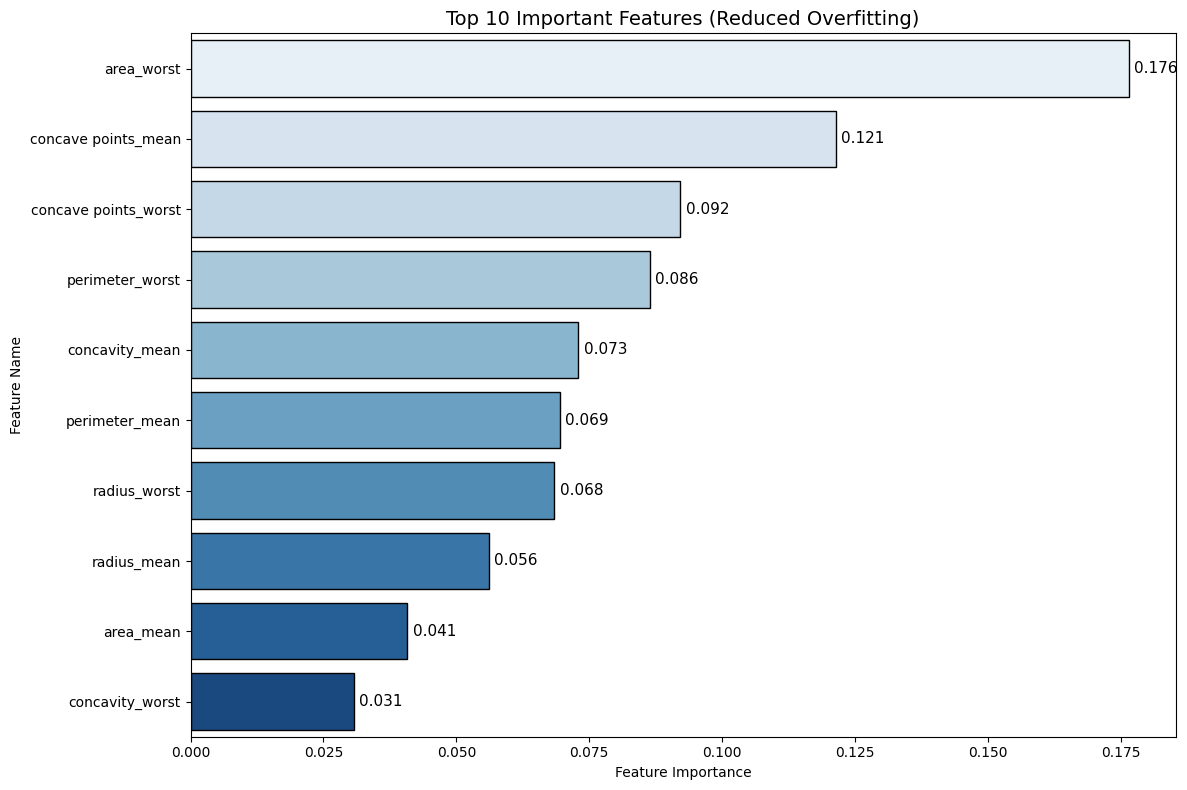

In [14]:
# استخراج أهم الخصائص
feature_importance = pd.DataFrame({
    'Feature': df.drop('diagnosis', axis=1).columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# رسم أهم 10 خصائص
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='Blues', edgecolor='black')
plt.title('Top 10 Important Features (Reduced Overfitting)', fontsize=14)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')

# عرض النسب على الأعمدة
for i, val in enumerate(feature_importance.head(10)['Importance']):
    plt.text(val + 0.001, i, f"{val:.3f}", va='center', fontsize=11)

plt.tight_layout()
plt.show()


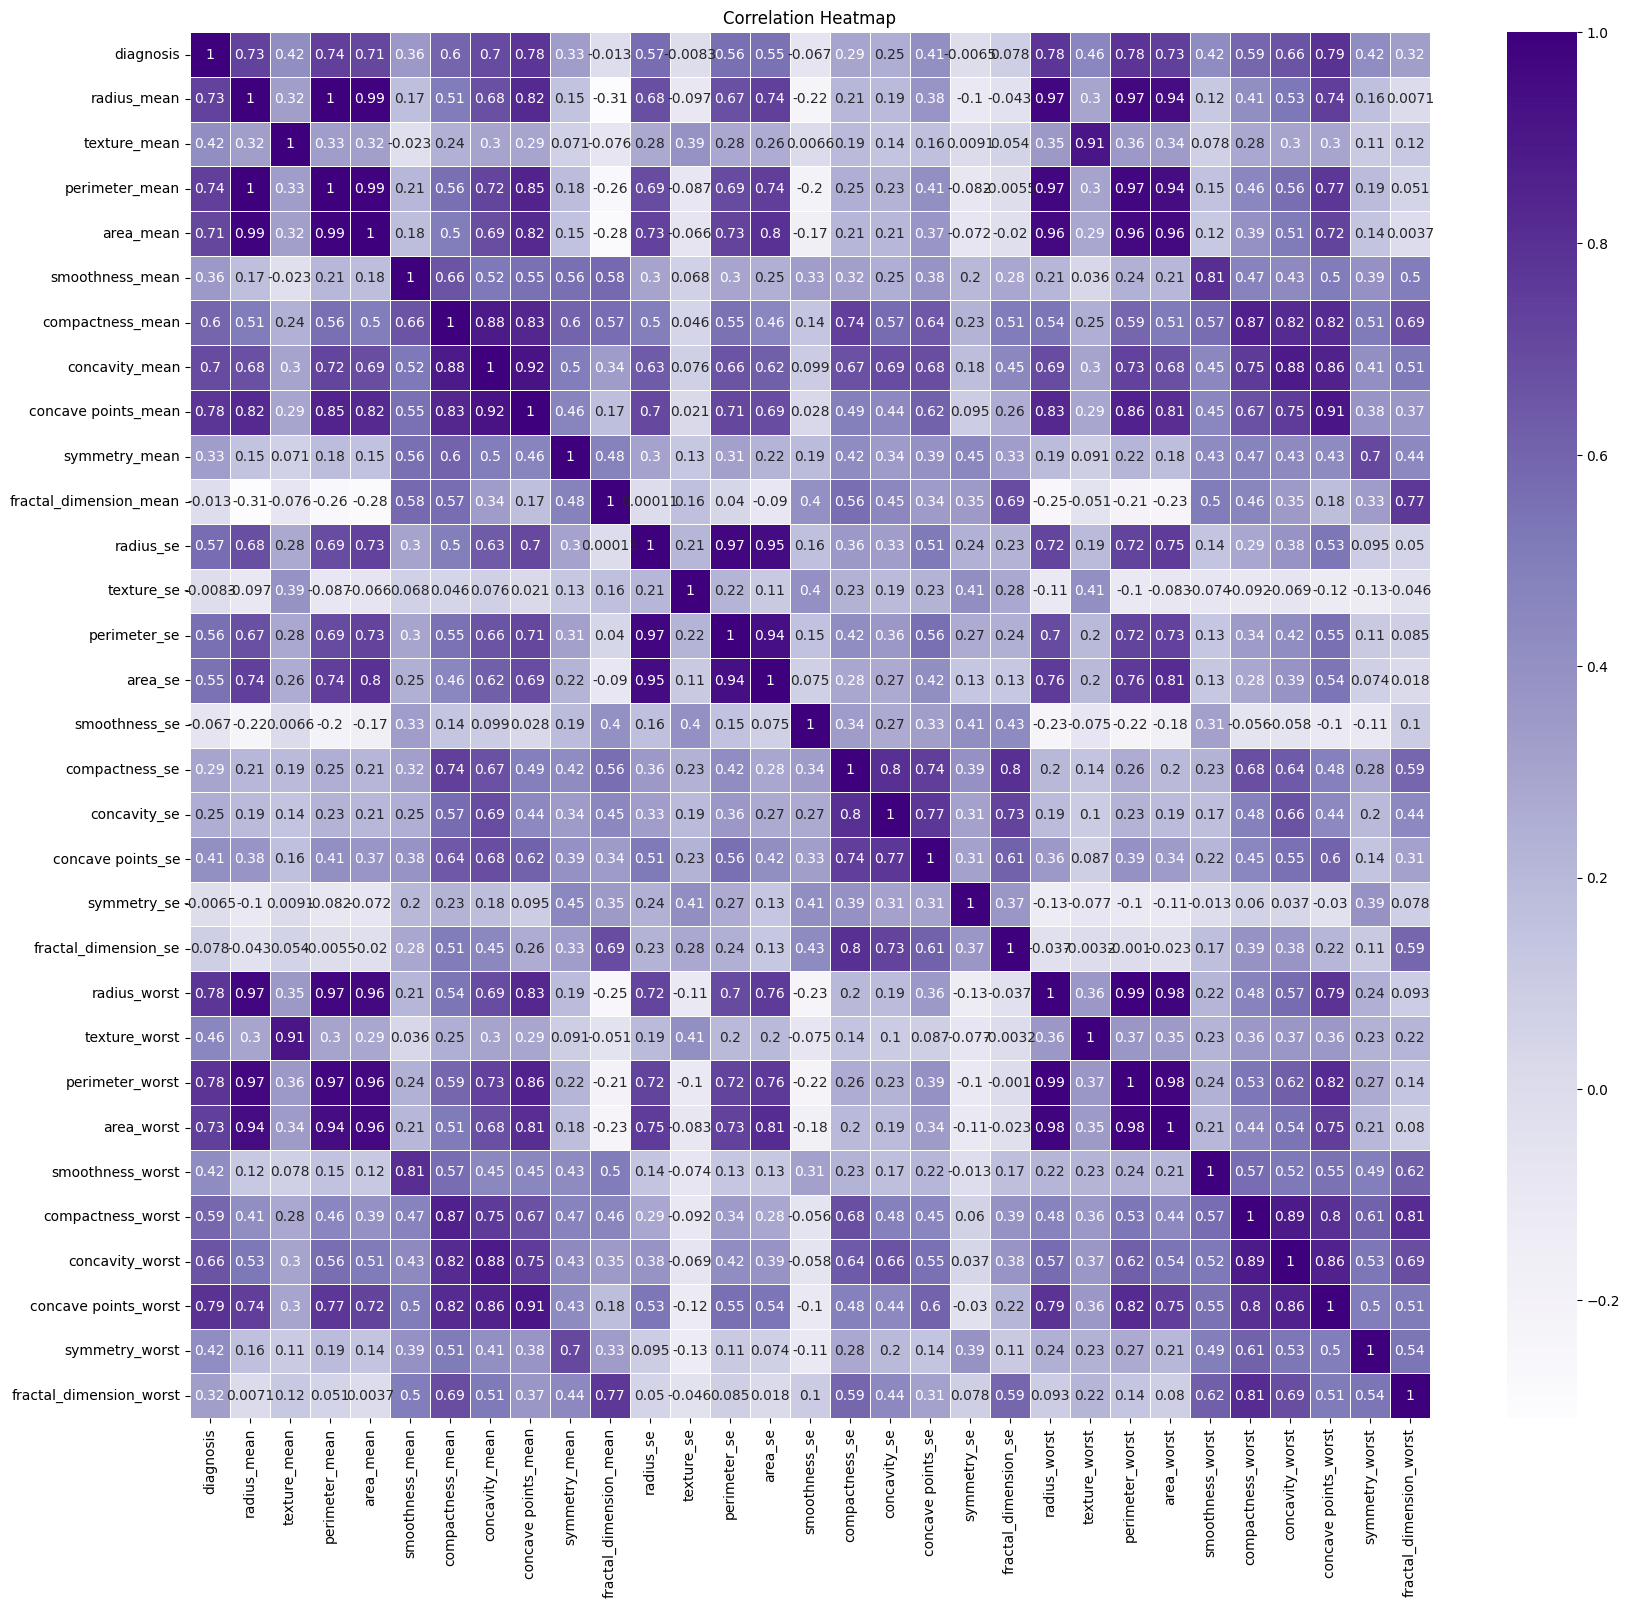

In [15]:
# التأكد من استخدام الأعمدة الرقمية فقط
numeric_data = df.select_dtypes(include=['number'])

# رسم الـ heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.5, cmap="Purples")
plt.title("Correlation Heatmap")
plt.show()


Loading dataset...

Training and evaluating models...

🧠 Logistic Regression
Accuracy: 0.9708
Precision: 0.9836
Recall: 0.9375
F1 Score: 0.9600
Confusion Matrix:
[[106   1]
 [  4  60]]

🧠 Random Forest
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9062
F1 Score: 0.9508
Confusion Matrix:
[[107   0]
 [  6  58]]

🧠 SVM
Accuracy: 0.9591
Precision: 1.0000
Recall: 0.8906
F1 Score: 0.9421
Confusion Matrix:
[[107   0]
 [  7  57]]

🧠 KNN
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9062
F1 Score: 0.9508
Confusion Matrix:
[[107   0]
 [  6  58]]

📊 Performance Summary:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.970760   0.983607  0.937500  0.960000
1        Random Forest  0.964912   1.000000  0.906250  0.950820
3                  KNN  0.964912   1.000000  0.906250  0.950820
2                  SVM  0.959064   1.000000  0.890625  0.942149


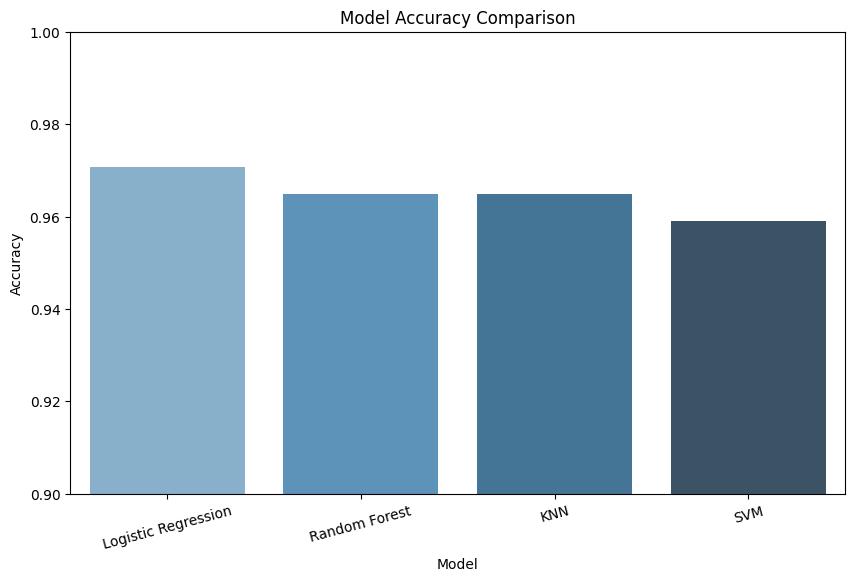

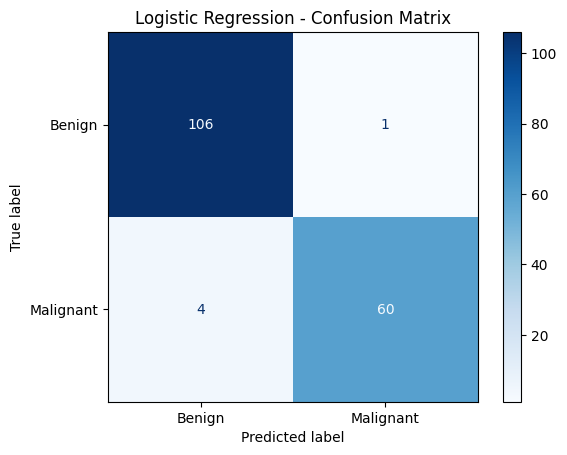

<ipython-input-25-113841ffc9b2>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='Blues_r')


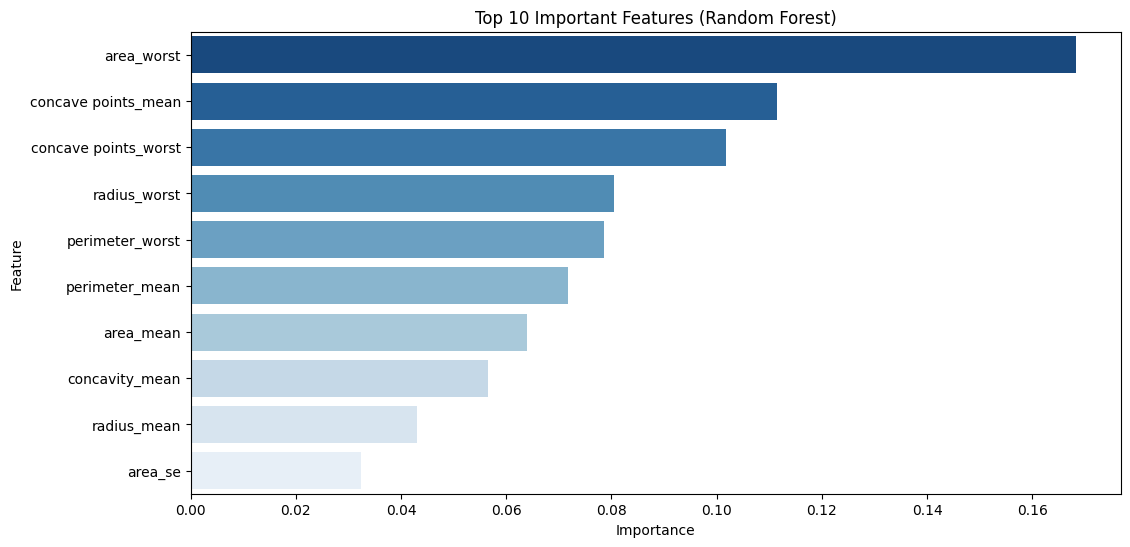

In [25]:
# -*- coding: utf-8 -*-
# Improved Breast Cancer Diagnosis Pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, precision_score, recall_score, f1_score
)

# 1. Load Dataset
print("\nLoading dataset...")
df = pd.read_csv('/content/data.csv')
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 2. Feature & Target Selection
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 3. Train/Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

metrics_summary = []

# 6. Training & Evaluation
print("\nTraining and evaluating models...")
for name, model in models.items():
    print(f"\n🧠 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    metrics_summary.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# 7. Summary Table
summary_df = pd.DataFrame(metrics_summary).sort_values('Accuracy', ascending=False)
print("\n📊 Performance Summary:")
print(summary_df)

# 8. Accuracy Visualization
plt.figure(figsize=(10, 6))
#sns.barplot(x='Model', y='Accuracy', data=summary_df, palette='Blues_d')
sns.barplot(x='Model', y='Accuracy', data=summary_df, hue='Model', palette='Blues_d', legend=False)
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1)
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()

# 9. Confusion Matrix for Best Model
best_model_name = summary_df.iloc[0]['Model']
best_model = models[best_model_name]
best_pred = best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(
    y_test, best_pred, display_labels=['Benign', 'Malignant'], cmap='Blues')
plt.title(f'{best_model_name} - Confusion Matrix')
plt.show()

# 10. Feature Importance (if Random Forest is available)
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='Blues_r')
    plt.title('Top 10 Important Features (Random Forest)')
    plt.show()


In [17]:
import joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [26]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00


In [27]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib
#from PIL import Image

# تحميل الصورة
#header_image = Image.open(r"C:\Users\Mariam\Downloads\Heade_flat.jpg")

#def show_image():
 #   return header_image

#header_block = gr.Interface(
#    fn=show_image,
 #   inputs=[],
  #  outputs=gr.Image(type="pil"),
   # title="🎗️ Breast Cancer Awareness",
    #description="Early detection saves lives. Know the signs, get screened, stay informed."
#)
from PIL import Image
import requests
from io import BytesIO

url = "https://img.freepik.com/free-vector/flat-twitter-header-template-breast-cancer-awareness-month_23-2150738773.jpg"
response = requests.get(url)
header_image = Image.open(BytesIO(response.content))

# تحميل النموذج والـ scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")
model_accuracy = 0.98  # لو عندك دقة حقيقية استخدمها هنا

# قائمة الخصائص
features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# التنبؤ من إدخال يدوي
def predict_manual(*inputs):
    df = pd.DataFrame([inputs], columns=features)
    X_scaled = scaler.transform(df)
    prediction = model.predict(X_scaled)[0]
    label = "❌ Malignant (Cancer)" if prediction == 1 else "✅ Benign (Non-Cancer)"
    return f"🔍 Prediction Result: {label}"

# التنبؤ من ملف CSV
def predict_file(file):
    try:
        df = pd.read_csv(file.name)
        missing = [f for f in features if f not in df.columns]
        if missing:
            return f"❌ Missing columns: {missing}", None
        X_scaled = scaler.transform(df[features])
        preds = model.predict(X_scaled)
        df["Prediction"] = np.where(preds == 1, "❌ Malignant", "✅ Benign")
        return "✅ Predictions done. See table below.", df
    except Exception as e:
        return f"⚠️ Error: {e}", None

# واجهة Gradio من قسمين
manual_inputs = [gr.Slider(minimum=0.0, maximum=1000.0, label=feat) for feat in features]

manual_section = gr.Interface(
    fn=predict_manual,
    inputs=manual_inputs,
    outputs=gr.Textbox(label="Diagnosis Result"),
    title="🧬 Breast Cancer Manual Prediction",
    description=f"Enter feature values manually. Model Accuracy: **{model_accuracy*100:.2f}%**"
)

file_section = gr.Interface(
    fn=predict_file,
    inputs=gr.File(label="📂 Upload CSV File"),
    outputs=[gr.Textbox(label="Status"), gr.Dataframe(label="Diagnosis Results")],
    title="📁 CSV File Prediction",
    description="Upload a file with correct feature columns. Predictions and labels will be shown below."
)

# دمج الواجهتين في تاب واحد
gr.TabbedInterface([manual_section, file_section], ["🧪 Manual Input", "📄 CSV Upload"]).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1cb11d3fc25ca90841.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
